In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error as mape
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse
%matplotlib inline

In [2]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
dta = pd.read_csv("C:\\Users\\sohit\\MTech Time series Project\\bank nifty nse data\\bank nifty data index\\^NSEBANK.csv", sep=',', index_col='Date', parse_dates=['Date'], date_parser=dateparse).fillna(0)


C:\Users\sohit\AppData\Local\Temp\ipykernel_26736\3847335359.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')


In [3]:
import pandas as pd
import numpy as np

dta['Close'].replace(0, pd.NA, inplace=True)  # Convert 0s to NaN for proper forward fill
dta['Open'].replace(0, pd.NA, inplace=True)
dta['High'].replace(0, pd.NA, inplace=True)
dta['Low'].replace(0, pd.NA, inplace=True)
dta['Adj Close'].replace(0, pd.NA, inplace=True)
dta['Volume'].replace(0, pd.NA, inplace=True)

# Convert zeros to NaNs to identify missing or invalid data
# stock_data.replace(0, pd.NA, inplace=True)

# Custom function to fill NaNs with the mean of the previous two values
def fill_with_mean_of_previous_two(series):
    filled_series = series.copy()
    for idx, value in series.items():
        if pd.isna(value):
            previous_values = series[:idx].dropna()[-2:]
            if len(previous_values) >= 2:
                mean_val = previous_values.mean()
                filled_series[idx] = mean_val
            else:
                # If there aren't enough previous values, use forward fill
                filled_series[idx] = series.ffill()[idx]
    return filled_series

# Apply the custom fill function to all relevant columns
columns_to_fill = ['Close', 'Open', 'Volume', 'Low', 'High', 'Adj Close']
dta[columns_to_fill] = dta[columns_to_fill].apply(fill_with_mean_of_previous_two)

# Optionally convert NaNs back to zeros
dta.fillna(0, inplace=True)

# Display the DataFrame after filling missing values
print(dta)

# Verify if there are any remaining NaNs
print("Null values in each column after filling:")
print(dta.isnull().sum())


                    Open          High           Low         Close  \
Date                                                                 
2022-09-05  39412.050781  39865.199219  39407.398438  39805.750000   
2022-09-06  39892.949219  40073.750000  39564.300781  39666.500000   
2022-09-07  39337.750000  39572.050781  39258.250000  39455.898438   
2022-09-08  39763.898438  40265.750000  39706.398438  40208.949219   
2022-09-09  40520.750000  40685.949219  40280.300781  40415.699219   
...                  ...           ...           ...           ...   
2023-08-30  44706.550781  44779.648438  44149.800781  44232.601563   
2023-08-31  44265.851563  44399.648438  43895.050781  43989.148438   
2023-09-01  43996.101563  44568.550781  43830.750000  44436.101563   
2023-09-04  44130.976563  44484.099610  43862.900390  44212.625000   
2023-09-05  44625.050781  44668.699219  44401.699219  44532.148438   

               Adj Close    Volume  
Date                                
2022-09-05  398

In [9]:
# # Sample data with 'Adj Close' column
# # dta.set_index('Date', inplace=True)  # Use 'Date' as the index

# # Split into train and test sets
# percentage = 0.80  # 80% for training, 20% for testing
# series = dta['Adj Close'].tolist()  # Convert 'Adj Close' to a list
# size = int(len(series) * percentage)
# train, test = series[:size], series[size:]

# # Fit the ARIMA model with the correct import path
# model = ARIMA(train, order=(9, 0, 0))  # AR(9) model
# model_fit = model.fit()

# # Summary of the fitted model
# print(model_fit.summary())

# # Forecast future values for the test set
# forecast = model_fit.forecast(steps=len(test))

# # Calculate RMSE for the test set
# rmse = mean_squared_error(test, forecast, squared=False)
# mape_value = mape(test, forecast)

# print("Test RMSE:", rmse)
# print(f'Mean Absolute Percentage Error = {mape_value * 100:.2f}%')

# # Plot the training and test data with the forecast
# plt.figure(figsize=(12, 6))
# plt.plot(series, label='Original Data')
# plt.plot(range(size, size + len(test)), forecast, label='Forecast', color='red')
# plt.legend()
# plt.title("ARIMA Forecast")
# plt.show()


In [ ]:
# Split into train and test sets
percentage = 0.80  # 80% for training, 20% for testing
series = dta['Adj Close'].tolist()  # Convert 'Adj Close' to a list
size = int(len(series) * percentage)
train, test = series[:size], series[size:]

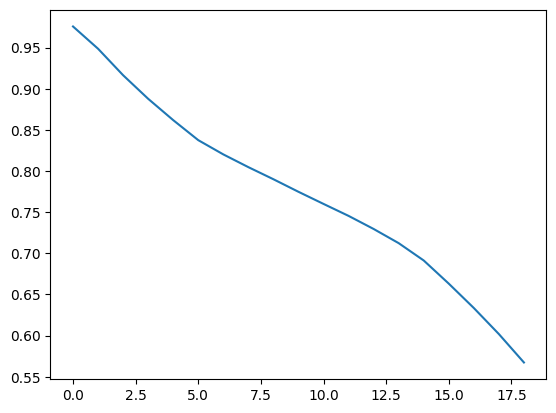

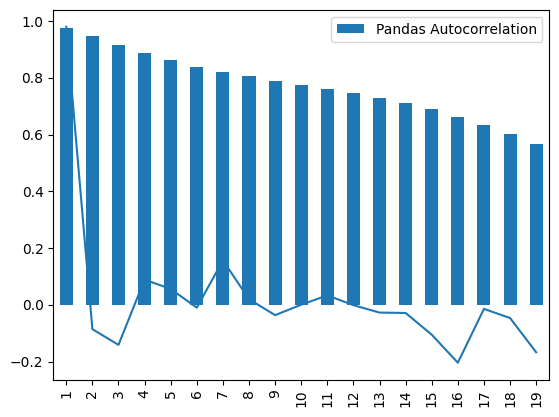

<AxesSubplot: >

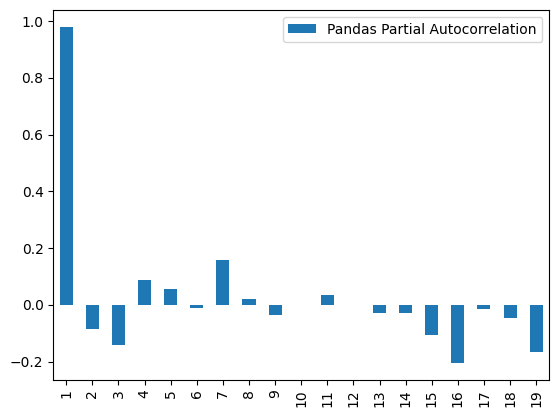

In [10]:
from statsmodels.tsa.stattools import acf, pacf
acf_1 = acf(series)[1:20]
plt.plot(acf_1)
test_df = pd.DataFrame([acf_1]).T
test_df.columns = ["Pandas Autocorrelation"]
test_df.index += 1
test_df.plot(kind='bar')
pacf_1 = pacf(series)[1:20]
plt.plot(pacf_1)
plt.show()
test_df = pd.DataFrame([pacf_1]).T
test_df.columns = ['Pandas Partial Autocorrelation']
test_df.index += 1
test_df.plot(kind='bar')
#from the figures we conclude that it is an AR process with a lag of 8-9

In [ ]:
len(train)

In [ ]:
len(test)

predicted=43460.122248, expected=43641.050781
predicted=43624.778873, expected=44121.500000
predicted=44109.202249, expected=44327.800781
predicted=44340.553313, expected=44747.351563
predicted=44745.634214, expected=45158.101563
predicted=45157.889945, expected=45301.449219
predicted=45281.364985, expected=45151.800781
predicted=44980.559910, expected=45339.898438
predicted=45219.328102, expected=44925.000000
predicted=44796.525663, expected=44860.851563
predicted=44692.052143, expected=44745.050781
predicted=44648.822427, expected=44639.449219
predicted=44619.373613, expected=44665.050781
predicted=44576.672344, expected=44819.300781
predicted=44852.854203, expected=45449.750000
predicted=45489.020483, expected=45410.851563
predicted=45443.692726, expected=45669.300781
predicted=45610.389200, expected=46186.898438
predicted=46161.796659, expected=46075.199219
predicted=46057.964935, expected=45923.050781
predicted=45710.982695, expected=45845.000000
predicted=45735.681164, expected=4

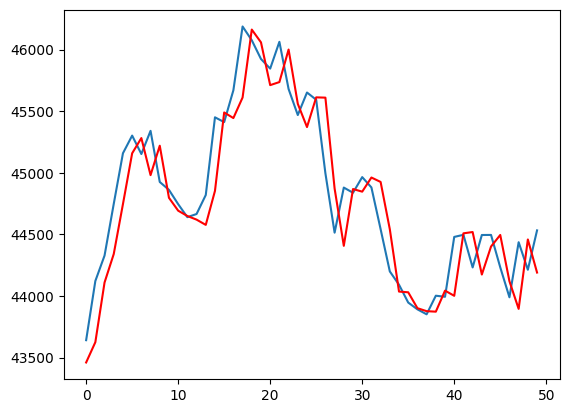

In [11]:
"""
Arima Rolling Forecast
"""
predicted1, resid_test = [], []
history = train
for t in range(len(test)):
    model = ARIMA(history, order=(7,0,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    resid_test.append(test[t] - output[0])
    predicted1.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat,obs))
test_resid = []
for i in resid_test:
    test_resid.append(i)
error = mean_squared_error(test, predicted1)
# # MAPE calculation function
# def mean_absolute_percentage_error(y_true, y_pred):
#     return 100 * (abs((y_true - y_pred) / y_true)).mean()
# print('Mean Absolute Percentage Error (MAPE):', round(mean_absolute_percentage_error(test, predicted1), 3), '%')
# Optionally, calculate mean absolute percentage error
from sklearn.metrics import mean_absolute_percentage_error as mape
mape_value = mape(test, predicted1)
print(f'Mean Absolute Percentage Error = {mape_value * 100:.2f}%')
print('Test MSE: %.3f' % error)
plt.plot(test)
plt.plot(predicted1, color='red')
plt.show()


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  200
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1472.601
Date:                Sun, 05 May 2024   AIC                           2951.203
Time:                        01:47:47   BIC                           2961.098
Sample:                             0   HQIC                          2955.207
                                - 200                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.181e+04    930.912     44.914      0.000       4e+04    4.36e+04
ar.L1          0.9740      0.016     60.471      0.000       0.942       1.006
sigma2      1.431e+05   1.26e+04     11.393      0.0

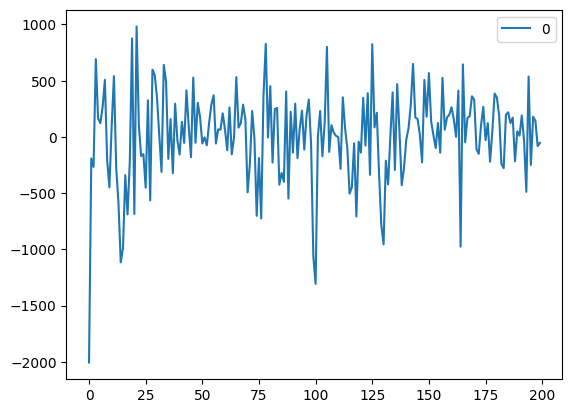

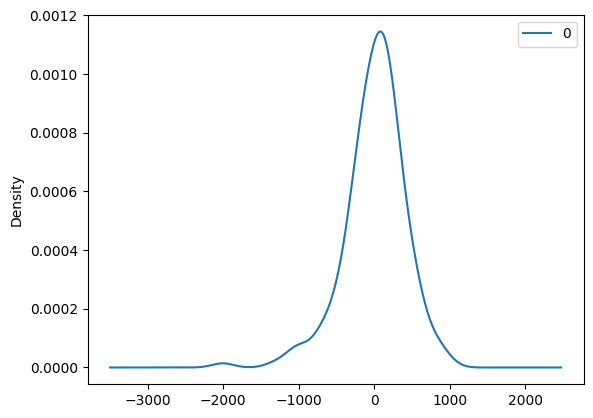

                 0
count   200.000000
mean      8.826058
std     403.976514
min   -2005.295034
25%    -189.687595
50%      53.317418
75%     237.411281
max     982.109983


<AxesSubplot: >

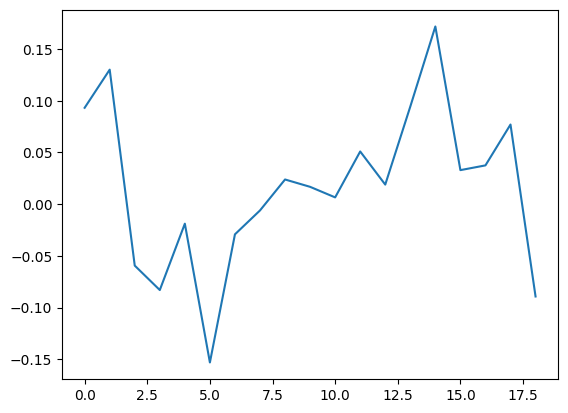

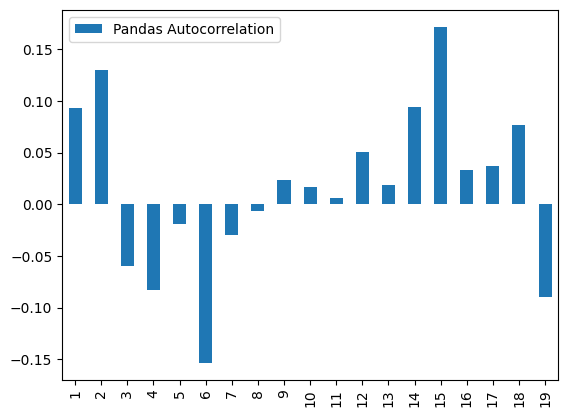

In [12]:
"""
Residual Diagnostics
"""
train, test = series[0:size], series[size:len(series)]
model = ARIMA(train, order=(1,0,0))
model_fit = model.fit()
print(model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())
#plot the acf for the residuals
acf_1 = acf(model_fit.resid)[1:20]
plt.plot(acf_1)
test_df = pd.DataFrame([acf_1]).T
test_df.columns = ["Pandas Autocorrelation"]
test_df.index += 1
test_df.plot(kind='bar')
#from the acf obtained from the residuals we concule that 
#there is still a nonlinear relationship among the residuals